<a href="https://colab.research.google.com/github/weso500/QMLIIOT/blob/main/TEPQSVM_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.2.2
    Uninstalling qiskit-2.2.2:
      Successfully uninstalled qiskit-2.2.2


In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

dimension = 11
feature_map = ZZFeatureMap(feature_dimension=dimension, reps=2, entanglement="full")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [ ]:
import pandas as pd
import numpy as np

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/TEP9Train.csv')

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/TEP9Test.csv')

# Convert training features to numpy array and select 100 samples
train_features = train_df.to_numpy()

test_features= test_df.to_numpy()

# Create target arrays for training and testing data
test_target = np.concatenate((np.zeros(50), np.ones(10)))

# Ensure arrays are of size samples*8 (assuming 8 is the number of features)
print(f"Shape of train_features: {train_features.shape}")
print(f"Shape of test_features: {test_features.shape}")
print(f"Shape of test_target: {test_target.shape}")

Shape of train_features: (200, 11)
Shape of test_features: (60, 11)
Shape of test_target: (60,)


In [ ]:
matrix_train = kernel.evaluate(x_vec=train_features)
matrix_test = kernel.evaluate(x_vec=test_features, y_vec=train_features)

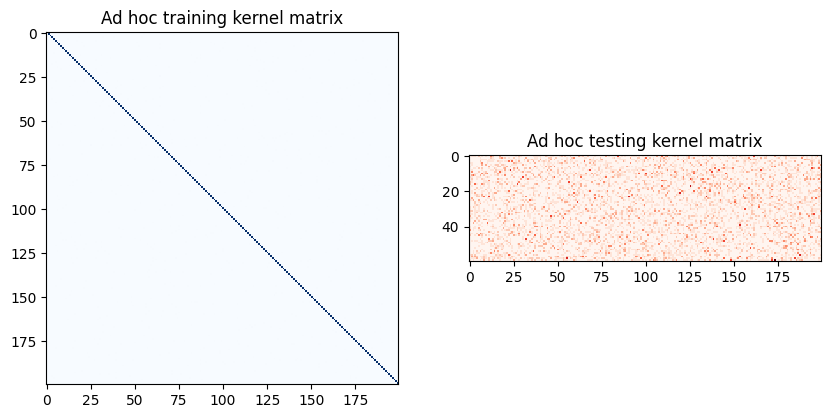

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='precomputed', nu=0.08)  # nu = anomaly proportion
ocsvm.fit(matrix_train)

OneClassSVM(kernel='precomputed', nu=0.08)

In [ ]:
scores = -ocsvm.decision_function(matrix_test)
print(scores)

[0.07837279 0.07936664 0.07993426 0.07868565 0.08079352 0.08071694
 0.07999234 0.07915399 0.07791203 0.07834716 0.07795839 0.07782352
 0.07868367 0.07947176 0.08203017 0.08089486 0.07749865 0.08024277
 0.08056203 0.07979136 0.0785832  0.08119424 0.07971392 0.07796659
 0.07953499 0.07999779 0.07969983 0.08157113 0.08003117 0.08259081
 0.07953592 0.0793301  0.08088368 0.07904433 0.07925634 0.08023065
 0.08094518 0.08157044 0.07955264 0.08009875 0.0794916  0.0803949
 0.08222263 0.0799289  0.07910671 0.07909173 0.07994663 0.07983868
 0.07915813 0.07963637 0.08088622 0.081336   0.08137186 0.08056134
 0.07938758 0.08094292 0.08041045 0.07962006 0.07661004 0.07798574]


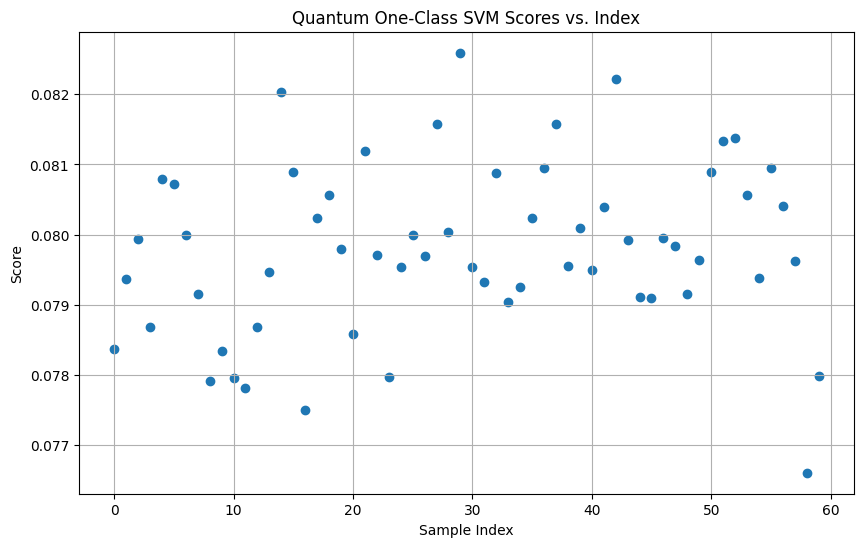

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of scores vs. index
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores)
plt.title("Quantum One-Class SVM Scores vs. Index")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [ ]:

import numpy as np
import pandas as pd
import pywt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



fpr, tpr, thresholds = metrics.roc_curve(test_target, scores, pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
loss_threshold = (thresholds[optimal_idx], 6)

auc = metrics.auc(fpr, tpr)
print(auc)


0.594
